In [ ]:
import pandas as pd

spotify = pd.read_csv('/content/drive/MyDrive/TCC Dataset/spotify_songs_2010_2019_normalized.csv')

df_pop = spotify[spotify['genre'].str.contains('^pop,', regex=True)]
df_hip_hop = spotify[spotify['genre'].str.contains('^hip hop,', regex=True)]

df_pop['genre'] = 'pop'
df_hip_hop['genre'] = 'hip hop'

df = pd.concat([df_pop, df_hip_hop])

<ipython-input-39-1c2b0cab1d73>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['genre'] = 'pop'
<ipython-input-39-1c2b0cab1d73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hip_hop['genre'] = 'hip hop'


In [ ]:
from numpy.ma.core import sqrt

def attribute_relevance(df1, df2, list_attr):
  dict_attributes = {}

  for attr in list_attr:
    delta = sqrt((df1[attr].var()/len(df1)) + (df2[attr].var()/len(df2)))
    dict_attributes[attr] = abs((df1[attr].mean() - df2[attr].mean())/delta)

  return dict_attributes

list_attribute = ['explicit', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

sorted_dict = sorted(attribute_relevance(df_pop, df_hip_hop, list_attribute).items(), key=lambda x: x[1])
print(sorted_dict)

[('mode', 0.4280315320097527), ('loudness', 0.8910762915555778), ('liveness', 1.0120734795393758), ('tempo', 1.4754798700656655), ('valence', 1.9485701635923491), ('key', 2.050542611786265), ('energy', 2.7022415420861896), ('acousticness', 3.042595776820854), ('instrumentalness', 3.2087586201177607), ('duration_ms', 5.026437272276415), ('danceability', 8.93121070555781), ('speechiness', 12.806903879037689), ('explicit', 18.31378405199911)]


In [ ]:
del df['artist']
del df['song']
del df['duration_ms']
# del df['explicit']
del df['year']
del df['popularity']
# del df['danceability']
del df['energy']
del df['key']
del df['loudness']
del df['mode']
# del df['speechiness']
del df['acousticness']
del df['instrumentalness']
del df['liveness']
del df['valence']
del df['tempo']
# del df['genre']

## Neural Network

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Dense

In [ ]:
num_dim = len(df.columns) - 1
label_enc = LabelEncoder()

# prepare atributes and class
X = df.iloc[:,0:num_dim]
y = label_enc.fit_transform(df.iloc[:,-1])

X['explicit'] = LabelEncoder().fit_transform(df.iloc[:,0:1])

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Dropout
from keras.models import Sequential

def createNet(optimizer, loss, kernel_initializer, activation, neurons):
  model = Sequential()

  model.add(Dense(units=neurons, activation=activation, input_dim=num_dim))
  model.add(Dense(units=neurons, activation=activation))
  model.add(Dense(units=1, activation='sigmoid'))

  model.compile(optimizer=optimizer, loss=loss, metrics=['binary_accuracy'])

  return model

classificador = KerasClassifier(build_fn=createNet)

parameters = {'epochs': [100, 150, 300, 450],
              'optimizer': ['adam'],
              'loss': ['binary_crossentropy'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu'],
              'neurons': [16, 32]}

grid_search = GridSearchCV(estimator=classificador, param_grid=parameters, scoring='accuracy', cv=5)
                           
grid_search = grid_search.fit(X, y)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(best_parameters)
print(best_score)

Epoch 1/100


<ipython-input-23-ea6d481ec7d5>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classificador = KerasClassifier(build_fn=createNet)


A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 355/450
29/29 [==============================] - 0s 2ms/step - loss: 0.5305 - binary_accuracy: 0.7446
Epoch 356/450
29/29 [==============================] - 0s 3ms/step - loss: 0.5299 - binary_accuracy: 0.7435
Epoch 357/450
29/29 [==============================] - 0s 3ms/step - loss: 0.5297 - binary_accuracy: 0.7435
Epoch 358/450
29/29 [==============================] - 0s 3ms/step - loss: 0.5299 - binary_accuracy: 0.7425
Epoch 359/450
29/29 [==============================] - 0s 3ms/step - loss: 0.5308 - binary_accuracy: 0.7414
Epoch 360/450
29/29 [==============================] - 0s 3ms/step - loss: 0.5304 - binary_accuracy: 0.7403
Epoch 361/450
29/29 [==============================] - 0s 3ms/step - loss: 0.5298 - binary_accuracy: 0.7425
Epoch 362/450
29/29 [==============================] - 0s 3ms/step - loss: 0.5308 - binary_accuracy: 0.7425
Epoch 363/450
29/29 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
model = keras.Sequential()

model.add(Dense(units=32, activation='relu', kernel_initializer='normal', input_dim=num_dim))
model.add(Dense(units=32, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=1, activation= 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

neural = model.fit(X_train, y_train, epochs=150, batch_size=20, validation_split=0.15, shuffle=True)

Epoch 1/150
37/37 [==============================] - 1s 8ms/step - loss: 0.6801 - accuracy: 0.5697 - val_loss: 0.6592 - val_accuracy: 0.6107
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.5643 - val_loss: 0.6176 - val_accuracy: 0.6107
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.6008 - val_loss: 0.5787 - val_accuracy: 0.6718
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7023 - val_loss: 0.5632 - val_accuracy: 0.6794
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7037 - val_loss: 0.5617 - val_accuracy: 0.6794
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7212 - val_loss: 0.5651 - val_accuracy: 0.6718
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.7023 - val_loss: 0.5604 - val_accuracy: 0.6870
Epoch 8/150
3

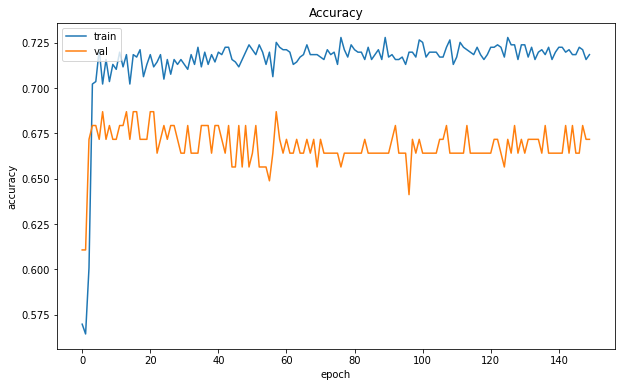

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(neural.history['accuracy'])
plt.plot(neural.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

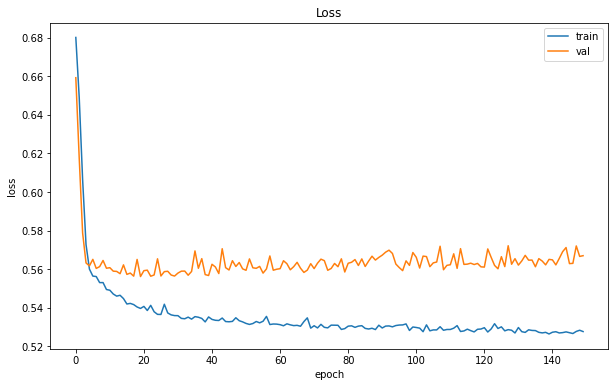

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(neural.history['loss'])
plt.plot(neural.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
previsores = model.predict(X_test)
previsores = (previsores > 0.5)

precisao = accuracy_score(y_test, previsores)
matrix = confusion_matrix(y_test, previsores)

resultado = model.evaluate(X_test, y_test)

print(matrix)

10/10 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.7172
[[ 92  63]
 [ 19 116]]
